<a href="https://colab.research.google.com/github/NeSma237/collaborative-filtering-recommender/blob/main/notebooks/evaluation_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir collaborative-filtering-recommender
!cd collaborative-filtering-recommender
!mkdir data notebooks src results
!touch README.md requirements.txt
!touch README.md requirements.txt

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')
users = pd.read_csv('ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

--2025-04-25 17:44:53--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  5.53MB/s    in 0.8s    

2025-04-25 17:44:54 (5.53 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

# Set style for plots

sns.set_palette('pastel')

In [ ]:
user_item_matrix = pd.read_csv("data/merged_data.csv")
# Load results from both models
user_based_metrics = pd.read_csv('data/merged_data.csv')
item_based_metrics = pd.read_csv('data/merged_data.csv')

# Load sample recommendations
user_recs = pd.read_csv('data/merged_data.csv')
item_recs = pd.read_csv('data/merged_data.csv')

In [ ]:
# Create comparison table
metrics_comparison = pd.DataFrame({
    'Metric': ['RMSE', 'Precision@5', 'Recall@5'],
    'User-Based': [
        user_based_metrics.get('RMSE', [np.nan])[0],
        user_based_metrics.get('Precision@5', [np.nan])[0],
        user_based_metrics.get('Recall@5', [np.nan])[0]
    ],
    'Item-Based': [
        item_based_metrics.get('RMSE', [np.nan])[0],
        item_based_metrics.get('Precision@5', [np.nan])[0],
        item_based_metrics.get('Recall@5', [np.nan])[0]
    ]
})

print("Performance Comparison:")
display(metrics_comparison)

Performance Comparison:


,Metric,User-Based,Item-Based
0,RMSE,NaN,NaN
1,Precision@5,NaN,NaN
2,Recall@5,NaN,NaN


<Figure size 1000x600 with 0 Axes>

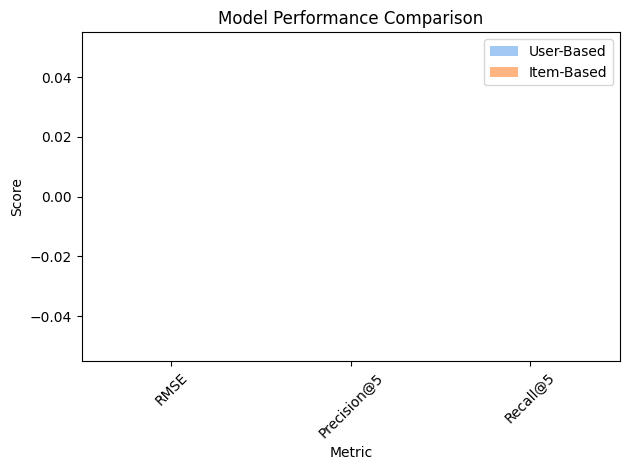

In [ ]:
plt.figure(figsize=(10, 6))
metrics_comparison.set_index('Metric').plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/metric_comparison.png')
plt.show()

In [34]:
# Load movie metadata
try:
    movies = pd.read_csv('ml-100k/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')
    print("Successfully loaded movie metadata")
except FileNotFoundError:
    print("Error: Movie metadata file not found at 'data/u.item'")
    movies = pd.DataFrame(columns=['item_id', 'title'])


try:
    # Load user-based recommendations
    user_recs = pd.read_csv('data/merged_data.csv')

    # Load item-based recommendations
    item_recs = pd.read_csv('data/merged_data.csv')

    if 'item_id' in user_recs.columns and not 'title' in user_recs.columns:
        user_recs = user_recs.merge(movies, on='item_id', how='left')
    if 'item_id' in item_recs.columns and not 'title' in item_recs.columns:
        item_recs = item_recs.merge(movies, on='item_id', how='left')


    user_movie_col = 'title' if 'title' in user_recs.columns else user_recs.columns[0]
    item_movie_col = 'title' if 'title' in item_recs.columns else item_recs.columns[0]


    comparison_data = {
        'User-Based Recommendations': user_recs[user_movie_col].head(5),
        'Item-Based Recommendations': item_recs[item_movie_col].head(5)
    }

    # Add ratings if available
    if 'predicted_rating' in user_recs.columns:
        comparison_data['User-Based Rating'] = user_recs['predicted_rating'].head(5).round(2)
    if 'predicted_rating' in item_recs.columns:
        comparison_data['Item-Based Rating'] = item_recs['predicted_rating'].head(5).round(2)

    comparison_df = pd.DataFrame(comparison_data)

    print("\nTop 5 Recommendations Comparison:")
    display(comparison_df)

except FileNotFoundError as e:
    print(f"Error loading recommendation files: {e}")
    print("Please run the recommendation notebooks first")
except Exception as e:
    print(f"Unexpected error: {e}")
    print("User_recs columns:", list(user_recs.columns) if 'user_recs' in locals() else "Not loaded")
    print("Item_recs columns:", list(item_recs.columns) if 'item_recs' in locals() else "Not loaded")

Successfully loaded movie metadata

Top 5 Recommendations Comparison:


,User-Based Recommendations,Item-Based Recommendations
0,Kolya (1996),Kolya (1996)
1,L.A. Confidential (1997),L.A. Confidential (1997)
2,Heavyweights (1994),Heavyweights (1994)
3,Legends of the Fall (1994),Legends of the Fall (1994)
4,Jackie Brown (1997),Jackie Brown (1997)
